In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib notebook

/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/usamazulfiqar/.

In [3]:
df = pd.read_csv('data.csv') #reading file 

In [4]:
df = df.drop(['id','Unnamed: 32'],axis=1) #dropping id and empty column at the end.

In [5]:
labelencoder_Y = LabelEncoder()
df.iloc[:,0] = labelencoder_Y.fit_transform(df.iloc[:,0].values) #Change 'M' and 'B' into 1 and 0 respectively.

In [6]:
X = df.iloc[:,1:].values #training on all attributes
sc = StandardScaler()
X = sc.fit_transform(X) #Scaling data to follow a Gaussian distribution

Y = df.iloc[:,0].values #training on diagnosis

In [7]:
kfold = KFold(n_splits=10) #10-fold cross-validation data split

In [8]:
acc_per_fold = [] #store the accuracy of every fold
overall_cm = np.zeros((2,2)) #Holds the overall confusion matrix

fold_no = 0 #keep track which fold the loop is in 

for train, test in kfold.split(X, Y):
    
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))
    # Adding dropout to prevent overfitting
    classifier.add(Dropout(rate=0.1))

    # Adding the second hidden layer
    classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
    # Adding dropout to prevent overfitting
    classifier.add(Dropout(rate=0.1))

    # Adding the output layer
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

    # Fitting the ANN
    classifier.fit(X[train], Y[train], batch_size=100, epochs=150, verbose=0)
    
    # Predictions from our model
    prediction = classifier.predict(X[test])
    prediction = prediction > 0.5
    
    #Measuring accuracy
    cm = confusion_matrix(Y[test], prediction)
    overall_cm += cm
    accuracy = (np.trace(cm)/Y[test].size) * 100
    acc_per_fold.append(accuracy)
    print(f'Accuracy for fold {fold_no} is {accuracy}%')
    
    fold_no += 1

print(f'Average accuracy for {kfold.get_n_splits()} folds is {np.mean(acc_per_fold)}%')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Accuracy for fold 0 is 96.49122807017544%
Accuracy for fold 1 is 96.49122807017544%
Accuracy for fold 2 is 94.73684210526315%
Accuracy for fold 3 is 94.73684210526315%
Accuracy for fold 4 is 98.24561403508771%
Accuracy for fold 5 is 98.24561403508771%
Accuracy for fold 6 is 98.24561403508771%
Accuracy for fold 7 is 98.24561403508771%
Accuracy for fold 8 is 100.0%
Accuracy for fold 9 is 96.42857142857143%
Average accuracy for 10 folds is 97.18671679197995%


<IPython.core.display.Javascript object>


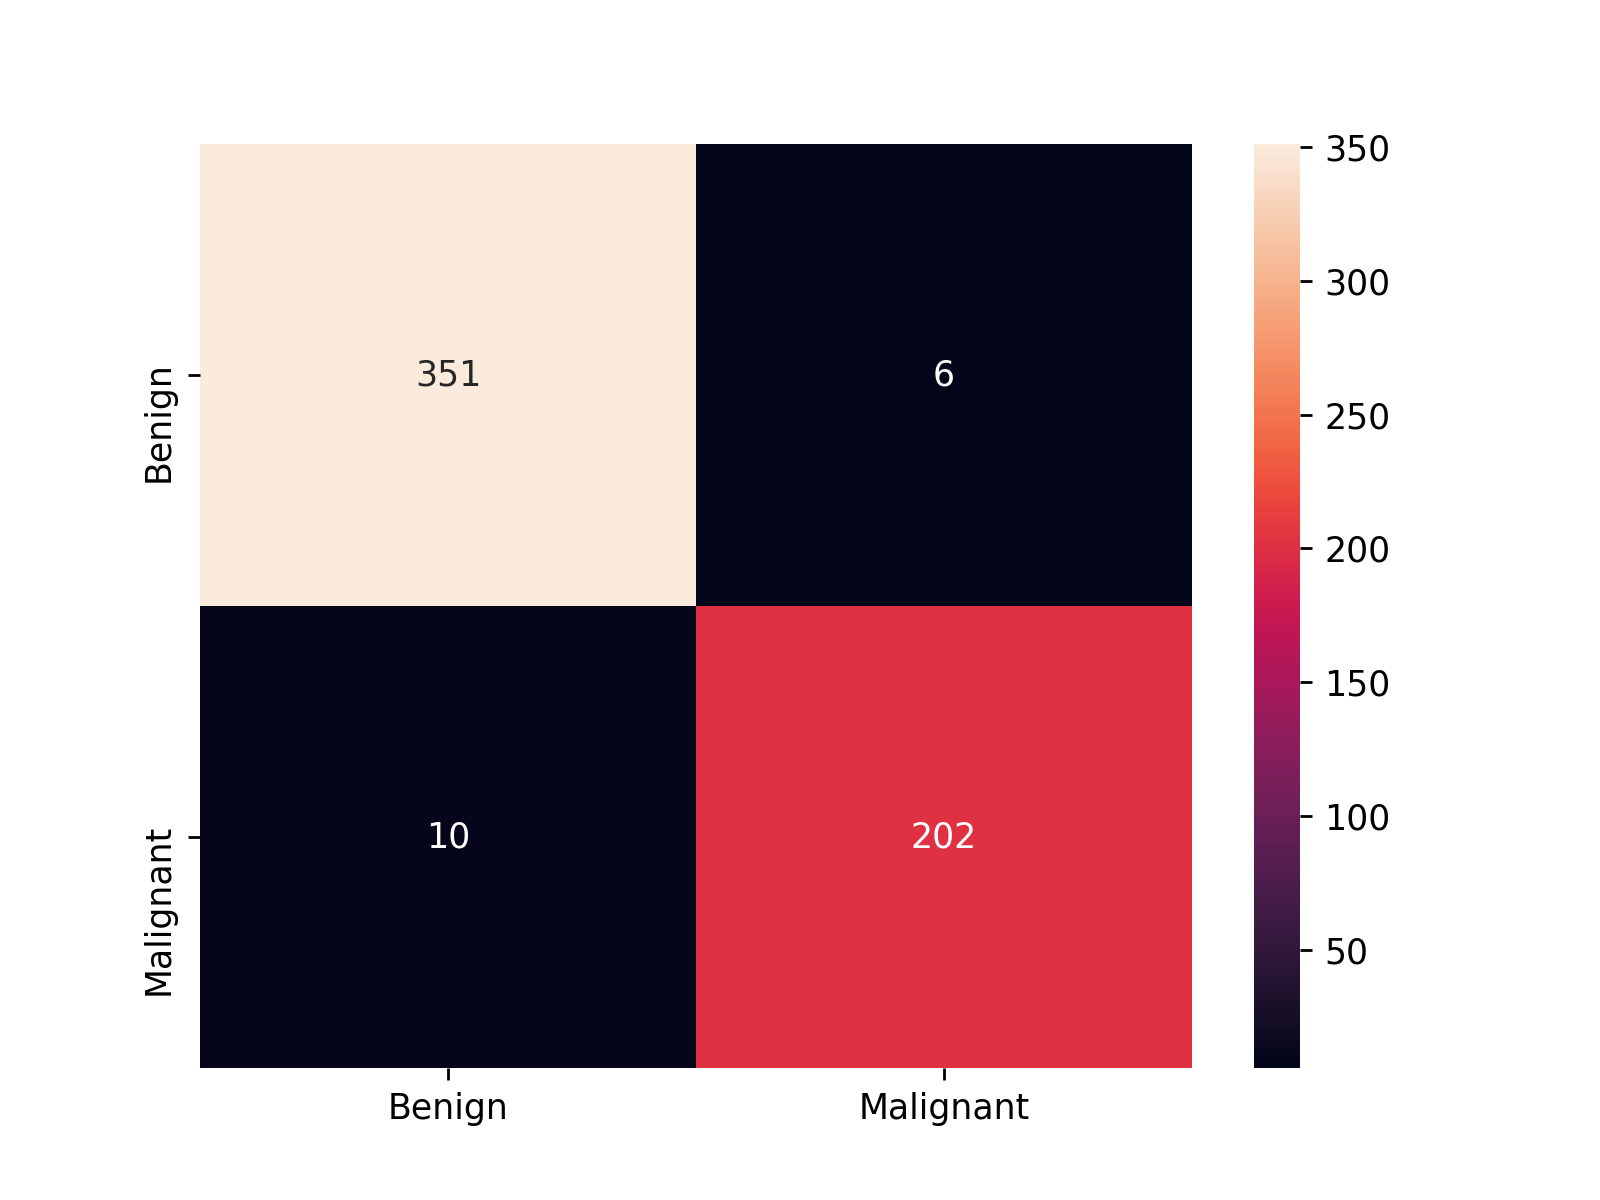

<AxesSubplot:>

In [9]:
sns.heatmap(overall_cm, annot=True, fmt='.0f', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])